## Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt
import string
import warnings
warnings.filterwarnings('ignore')
random.seed(12)
%matplotlib inline

#Open file
f = open('Ch_trainfile_Sentiment_3000.txt')
all_text = [line.split('\t') for line in f.readlines()] # use tab to split
all_text_processed = []
print('Original data number: {}.'.format(len(all_text)))

print('\nNo score for some rows. Delete from all_text.')
for line in all_text: # no score for some rows
    if len(line[0])<2:
        print(line)
        
print('\nPreprocessing: score to int, text truncate \\n.')
for score, text in all_text:
    if score == ' ':
        continue
    else:
        score = int(score)
    text = text.split('\n')[0]
    for c in string.punctuation:
        text = text.replace(c,'')
    text = text.replace('、','')
    all_text_processed.append((score, text))
print('Processed data number: {}.'.format(len(all_text_processed)))

Original data number: 3001.

No score for some rows. Delete from all_text.
[' ', '但人真的很多\n']
[' ', '问我们价格如何啊\n']
[' ', '钱包瘦身不少\n']
[' ', '虽然更迭了不少品牌\n']
[' ', '现在不去百货店了\n']
[' ', '中午白领吃饭什么的人很多的\n']
[' ', '还早杀到上海奥特莱斯\n']
[' ', '都还不错\n']
[' ', '小吃\n']
[' ', '就是逛逛\n']
[' ', '记得他结婚时也选择这个品牌\n']
[' ', '现在国金和世贸开出之后就比较少光顾了\n']
[' ', '经常和闺蜜去\n']
[' ', '没法经常去\n']

Preprocessing: score to int, text truncate \n.
Processed data number: 2987.


## Segmentation for Chinese words

In [2]:
import jieba

word_set = set()
all_text_seg = []
i = 0
N = 100
FULL_MODE = False

print('Print first {} cut results.'.format(N))
for score, text in all_text_processed:
    word_list = list(jieba.cut(text, cut_all=FULL_MODE))
    if i < N:
        print(i, '/'.join(word_list))
    i += 1
    all_text_seg.append((score, word_list))
    word_set |= set(word_list)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/lt/fz9lkb516cx9lgtmq06_vh_00000gn/T/jieba.cache


Print first 100 cut results.


Loading model cost 0.995 seconds.
Prefix dict has been built succesfully.


0 商场/几乎/都/没有/活动
1 总体/感觉/蛮/好/的
2 但是/货品/实在/不/咋/滴
3 人/比较/少
4 还是/贵/的
5 女装/就/很少/啦
6 还/不/知道/这家/会/不会/出现/呢
7 去/龙之梦/购物/还是/一站式/蛮/方便/的
8 那些/BA/ /也/一个个/死/人脸/一样
9 但/唐宫/等位/要/有/耐心/哦
10 整体/环境/不错
11 主要/是/去/麦吉柯
12 人/就/没少/过
13 就是/布局/实在/是/不/喜欢
14 没有/体力/是/一项/不能/完成/的/任务
15 综合型/购物/商场
16 已经/车位/停/了/超满
17 一条龙/了
18 其实/去/正大/的/次数/不/多
19 夏天/的/时候/去过/奥/特莱斯
20 以前/住/浦东/的/时候/经常/去逛
21 就/吃/了/点/东西
22 后面/的/大块/都/是/B/区
23 人山人海
24 是/个/休闲/的/好去处
25 以前/比较/喜欢/在/5/楼/以上/吃饭
26 商场/很大
27 一般/去/百货公司
28 大家/都/有/诸多/变化
29 购物/也/很/方便
30 对/不/太/逛得/人/来说/容易/迷路
31 左右/两边/搞不清楚
32 在/最/上面/几层/餐厅/非常/多
33 很大
34 周六/晚上/去/的
35 品质/就/不用说/了
36 失望/哒
37 格局/还是/不错/的
38 其他/店/都/没有/什么/顾客
39 有/免费/停车场
40 买过/几次/汗衫
41 看/了/很多
42 书店
43 哥哥/说/不错/啊
44 逛/的/最/多/的/大/商场/就是/这里/了
45 谁/知道/真的假/的/呢
46 感觉/有点/小
47 而且/人暴/多
48 非常/便捷/的/购物中心
49 所以/姐妹/们/注意/了
50 釜山/料理/豆捞坊/巴/贝拉
51 有/电影院
52 样子/也/不怎么样
53 东西/很/便宜
54 5/楼/吃/的/东东/挺/多
55 认真/逛/一天/很难/逛/完/的
56 综合性/商场
57 先找/好/回去/的/车站
58 于是/从那以后/对/正大/实在/有/阴影/ /也/不敢/去/了
59 找/不到/想/找/的/地方
60 尺码/少
61 停车场/很大
62 餐饮
63 不过/价格/和/外国/的/折扣店/比/真是/差/很多/啊
64 到/陆家嘴/么/正大/必

## Build X and y from data

In [3]:
X = []
y = []
for s, t in all_text_seg:
    word_vector = []
    y.append(s)
    for w in word_set:
        if w in t:
            word_vector.append(1)
        else:
            word_vector.append(0)
    X.append(word_vector)

X = np.array(X).astype('float64')
y = np.array(y).astype('float64')

print(X.shape)
print(y.shape)

(2987, 3370)
(2987,)


## Compare several SVM models with other classifiers

In [4]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score

K = 5

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(),
    LinearSVC(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB()]

parameters = {
    "Nearest Neighbors": {'n_neighbors':[1, 5, 10]},
    "Linear SVM": {'C':[0.2, 1, 5]},
    "RBF SVM": {'C':[0.2, 1, 5]},
    "Decision Tree": {'max_depth':[5, 10]}, 
    "Random Forest": {'max_depth':[5, 10], 'n_estimators':[5, 10]}, 
    "Neural Net": {'alpha':[0.1, 1]}, 
    "AdaBoost": {'learning_rate':[0.1, 0.5, 1]},
    "Naive Bayes": {}
}

best = []
acc = []
for name, clf in zip(names, classifiers):
    print('{} starts.'.format(name))
    st = time.time()
    clf_gs = GridSearchCV(clf, parameters[name], cv=K, n_jobs=-1)
    clf_gs.fit(X, y)
    acc.append(clf_gs.best_score_)
    best.append(clf_gs.best_estimator_)
    # acc.append(np.mean(cross_val_score(clf, X, y, cv=K)))
    print('......Total runtime {} seconds.'.format(time.time() - st))

Nearest Neighbors starts.
......Total runtime 131.08460807800293 seconds.
Linear SVM starts.
......Total runtime 2.6829848289489746 seconds.
RBF SVM starts.
......Total runtime 234.40552186965942 seconds.
Decision Tree starts.
......Total runtime 4.240596055984497 seconds.
Random Forest starts.
......Total runtime 3.3551571369171143 seconds.
Neural Net starts.
......Total runtime 119.40251898765564 seconds.
AdaBoost starts.
......Total runtime 33.73392987251282 seconds.
Naive Bayes starts.
......Total runtime 2.660814046859741 seconds.


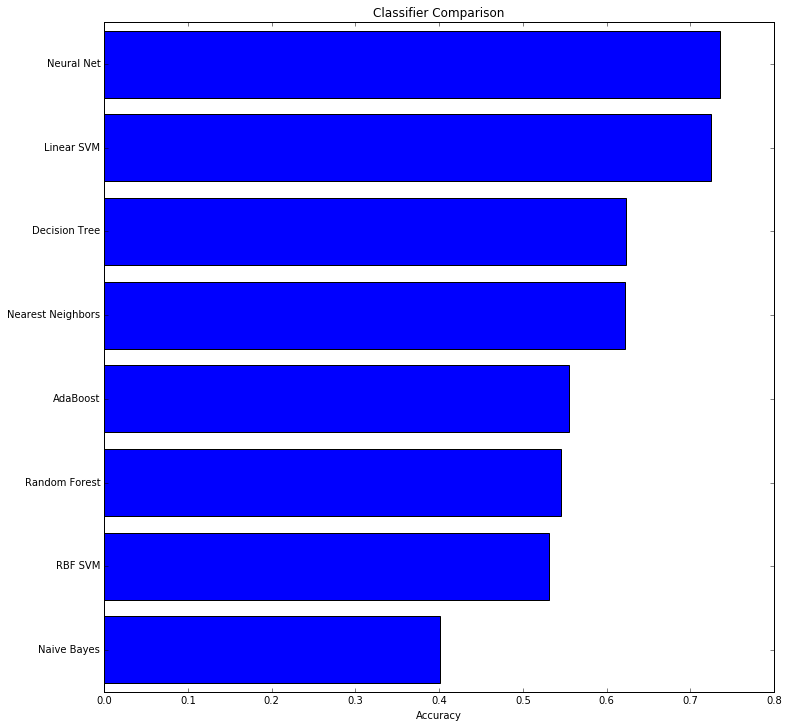

In [5]:
# Plot feature importance
fig = plt.figure(figsize=(12,12))
# make importances relative to max importance
sorted_idx = np.argsort(acc)
pos = np.arange(sorted_idx.shape[0]) + .5
acc = np.array(acc)
plt.barh(pos, acc[sorted_idx], align='center')
names = np.array(names)
plt.yticks(pos, names[sorted_idx])
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.show()